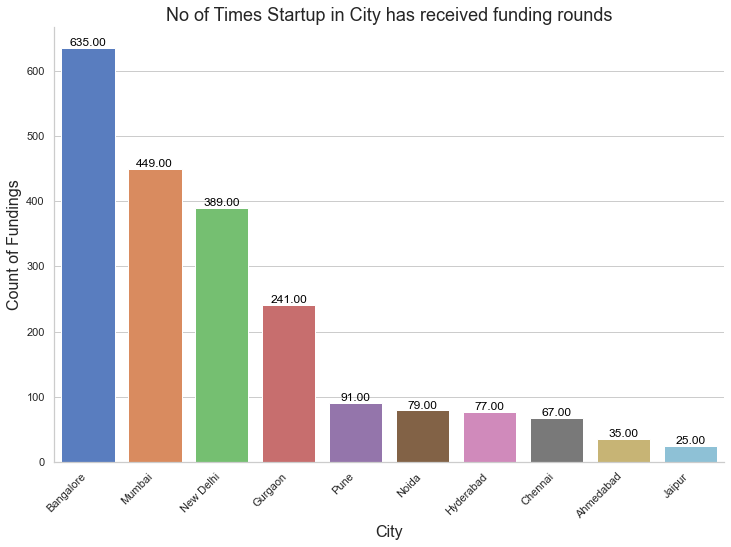

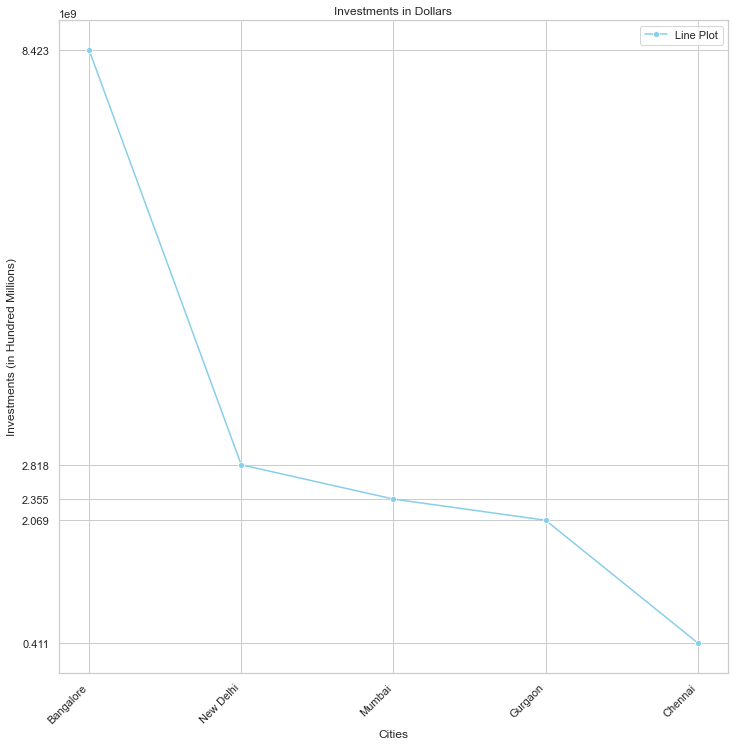

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('startup_funding.csv')

# cleaning and imputation
df = data.copy()
df = df.dropna(subset = ["CityLocation"])    
df["CityLocation"] = df["CityLocation"].replace(['Delhi', 'bangalore','Pune / US','Bangalore / SFO','New Delhi / US','Bangalore/ Bangkok','Mumbai / NY','New Delhi/ Houston','Bangalore / Palo Alto','Gurgaon / SFO','Mumbai / UK','Noida / Singapore','Mumbai / Global','Pune/Seattle','Pune / Singapore','Chennai/ Singapore','Hyderabad/USA','New Delhi / California','Bangalore / USA','Bangalore / San Mateo','Pune / Dubai'],["New Delhi", 'Bangalore','Pune','Bangalore','New Delhi', 'Bangalore','Mumbai','New Delhi','Bangalore','Gurgaon','Mumbai','Noida','Mumbai','Pune','Pune','Chennai','Hyderabad','New Delhi','Bangalore','Bangalore','Pune'])
city = df["CityLocation"]          
citys = city.value_counts()[:10]  


# plotting graph
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=citys.index, y= citys.values, data=df, palette='muted', ci=None, capsize=0.2, errwidth=2)

plt.xlabel('City', fontsize=16)
plt.ylabel('Count of Fundings', fontsize=16)
plt.title('No of Times Startup in City has received funding rounds', fontsize=18)

plt.xticks(rotation=45, ha='right')
plt.bar_width = 0.6

sns.despine()

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()



#df = data.copy()
df.dropna(subset = ['AmountInUSD'], inplace = True)
df['AmountInUSD'] = df['AmountInUSD'].str.replace(',', '')
df.AmountInUSD = df.AmountInUSD.astype(int)
res = df.groupby('CityLocation')['AmountInUSD'].agg('sum')
res = res.sort_values(ascending = False)
y_value = [i for i in res.values[:5]]
# Create a Seaborn line plot
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")  
sns.lineplot(x = res.index[:5], y=res.values[:5], marker='o', label='Line Plot', color='skyblue')

# Customize the plot
plt.title('Investments in Dollars')
plt.xlabel('Cities')
plt.ylabel('Investments (in Hundred Millions)')
plt.xticks(rotation=45, ha='right')

plt.yticks(y_value)

plt.legend()  
plt.show()

In [120]:
for i in res.values:
    print(len(str(i)))

12
12
12
12
11
11
11
11
10
10
10
10
10
10
10
9
9
9
9
9
9
9
9
9
9
9
9
8
8
8
8
8
8
8
7
7




<div style="background-color: #f2f2f2; padding: 10px;">
Looking at the graph, we can say that the Bangalore has received most funding rounds for startup, which implies Bangalore is the trending place for the Startups
</div>


Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


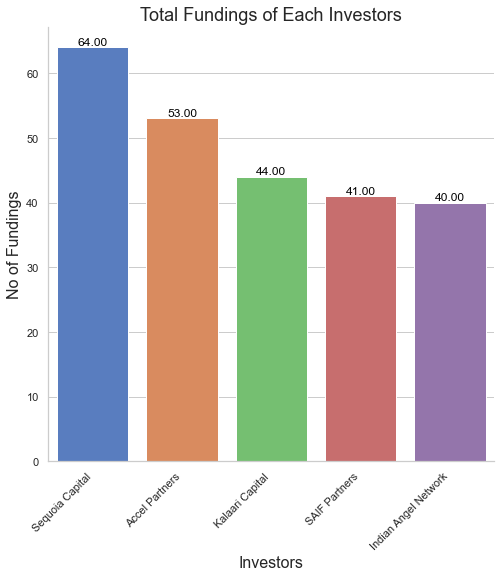

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')
df = data.copy()
a = df['InvestorsName'].str.split(',')  
arr = []                               

a = list(a)                           
for i in a:                          
    if type(i) != float:                                                      
        for j in i:
            arr.append(j)
    else:                              
        arr.append(i)        
df2 = pd.DataFrame(arr)               
        
                                                
a = df2[0]
b = a.str.lstrip()                   
c = b.value_counts()[:5]             
                                
d = c.index
e = c.values
for i in range(len(e)):         
    print(d[i], e[i])

    
    
# plotting graph
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
ax = sns.barplot(x=d, y= e, data=df, palette='muted', ci=None, capsize=0.2, errwidth=2)

plt.xlabel('Investors', fontsize=16)
plt.ylabel('No of Fundings', fontsize=16)
plt.title('Total Fundings of Each Investors', fontsize=18)

plt.xticks(rotation=45, ha='right')
plt.bar_width = 0.6

sns.despine()

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

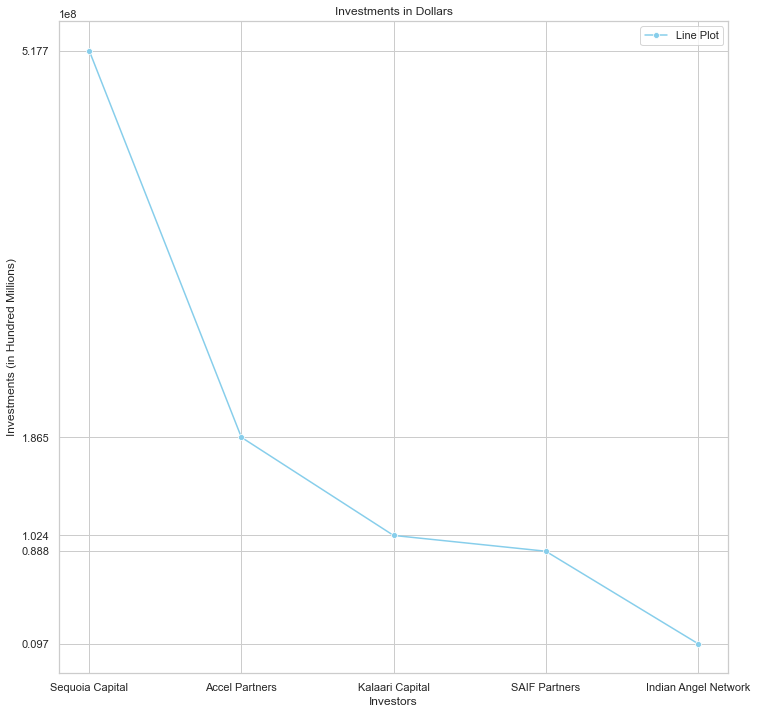

In [116]:
df = data.copy()
df.dropna(subset = ['AmountInUSD'], inplace = True)
df['AmountInUSD'] = df['AmountInUSD'].str.replace(',', '')
df['InvestorsName'] = df['InvestorsName'].str.split(',')
dict= {}
for k in d:
    for i, j in zip(df['InvestorsName'], df.AmountInUSD):
        if type(i) != float:
            if k in i:
                j = int(j)
                dict[k] = dict.get(k, j) + j


y_value = [i for i in dict.values()]
# Create a Seaborn line plot
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")  
sns.lineplot(x = dict.keys(), y=dict.values(), marker='o', label='Line Plot', color='skyblue')

# Customize the plot
plt.title('Investments in Dollars')
plt.xlabel('Investors')
plt.ylabel('Investments (in Hundred Millions)')
plt.yticks(y_value)

plt.legend()  
plt.show()


In [85]:
dict.values()

dict_values([517700000, 186450000, 102370000, 88850000, 9710000])

<div style="background-color: #f2f2f2; padding: 10px;">
Looking at this, Sequioa Capital has invested Max times about 517 Millions.
</div>

        Top 5 Investors  No. of Investment in Different Startup
0       Sequoia Capital                                      48
1        Accel Partners                                      47
2       Kalaari Capital                                      41
3  Indian Angel Network                                      40
4        Blume Ventures                                      36


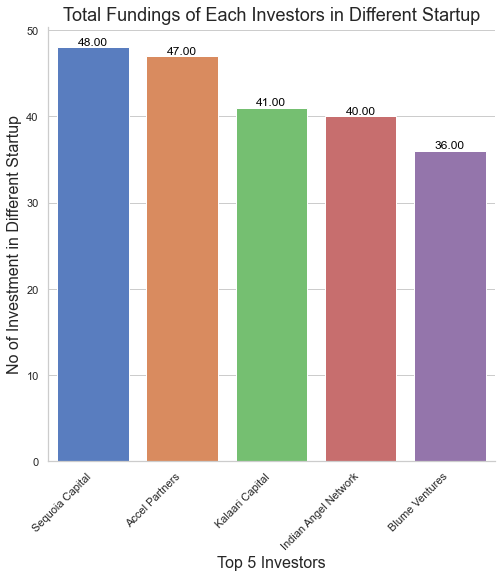

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')
df = data.copy()
df["StartupName"].replace("Olacabs","Ola",inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("OYo Rooms","Oyo",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)


# Creating data frame consisting of only 2 columns "StartupName" and "InvestorsName"
# Dropping NA values

df = df[["StartupName","InvestorsName"]]
df.dropna(inplace=True)

# Creating 2 list for StartupName and InvestorsName

startup_name=list(df["StartupName"].values)
investor_name=list(df["InvestorsName"].values)

# Traversing in the investor_name list , splitting by "," and applying the strip()
i=0
while i<len(investor_name):
    if ',' in investor_name[i] :
        l1 = investor_name[i].split(',')
        j = i 
        investor_name[j] = l1[0]
        j = j + 1
        for k in range(1,len(l1)): 
            investor_name.insert(j,l1[k].strip())
            startup_name.insert(j,startup_name[i])
            j = j + 1
        i = i + len(l1) - 1
    i = i + 1

l2 = []
for i in range(len(startup_name)):
    l2.append(investor_name[i]+"with"+startup_name[i])
l2 = list(set(l2))

# Creating a seperate list for the investor name 

l3 = []
for i in l2:
    i = i.split('with')
    l3.append(i[0].strip())

# Creating a new series with list of investor name 
df_new = pd.Series(l3)
x = df_new.value_counts().sort_values(ascending=False)
x.drop("",inplace=True)
x = x[0:5]
df = pd.DataFrame(x.index,columns=["Top 5 Investors"])
df["No. of Investment in Different Startup"] = x.values
print(df)

# plotting graph
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
ax = sns.barplot(x=df['Top 5 Investors'].values, y= df["No. of Investment in Different Startup"], data=df, palette='muted', ci=None, capsize=0.2, errwidth=2)

plt.xlabel('Top 5 Investors', fontsize=16)
plt.ylabel('No of Investment in Different Startup', fontsize=16)
plt.title('Total Fundings of Each Investors in Different Startup', fontsize=18)

plt.xticks(rotation=45, ha='right')
plt.bar_width = 0.6

sns.despine()

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()



<div style="background-color: #f2f2f2; padding: 10px;">
Sequioa Capital has invested in most of the Startups.
</div>

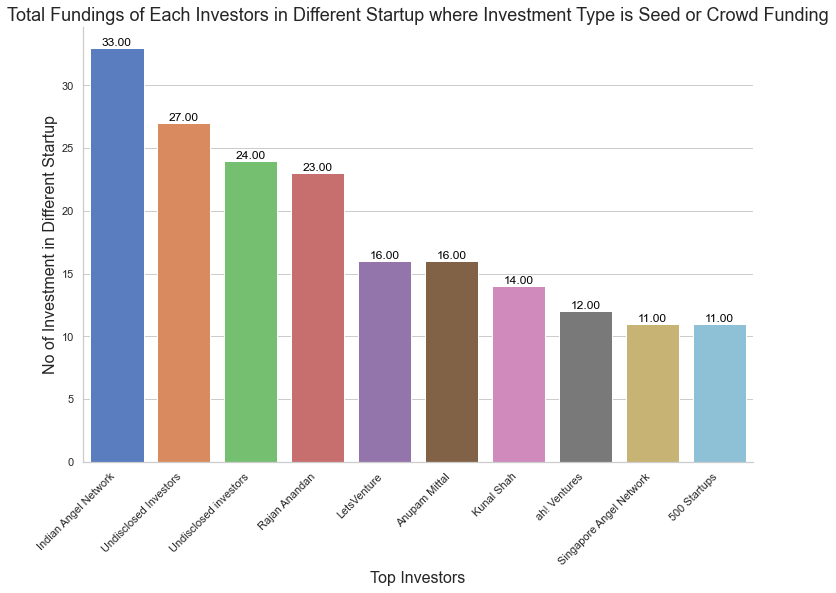

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')
df = data.copy()
df["StartupName"].replace("Olacabs","Ola",inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("OYo Rooms","Oyo",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)


# Creating data frame consisting of only 2 columns "StartupName" and "InvestorsName"
# Dropping NA values

df = df[["StartupName","InvestorsName", 'InvestmentType']]
df.dropna(inplace=True)

## We create dataframe where investmenttype is seed funding and crowd funding.
ab = df[(df["InvestmentType"] == 'Seed Funding') | (df['InvestmentType']== 'Crowd Funding')]  

startup_name=list(ab["StartupName"].values)
investor_name=list(ab["InvestorsName"].values)

# Traversing in the investor_name list , splitting by "," and applying the strip()
i=0
while i<len(investor_name):
    if ',' in investor_name[i] :
        l1 = investor_name[i].split(',')
        j = i 
        investor_name[j] = l1[0]
        j = j + 1
        for k in range(1,len(l1)): 
            investor_name.insert(j,l1[k].strip())
            startup_name.insert(j,startup_name[i])
            j = j + 1
        i = i + len(l1) - 1
    i = i + 1

# Creating a new list l2 and appending the investor name with their invested startup name 
# Creating list with only unique values by set() func.

l2 = []
for i in range(len(startup_name)):
    l2.append(investor_name[i]+"with"+startup_name[i])
l2 = list(set(l2))

# Creating a seperate list for the investor name 

l3 = []
for i in l2:
    i = i.split('with')
    l3.append(i[0].strip())

# Creating a new series with list of investor name 
df_new = pd.Series(l3)
x = df_new.value_counts().sort_values(ascending=False)
x.drop("",inplace=True)
x = x[0:10]
df = pd.DataFrame(x.index,columns=["Top 5 Investors"])
df["No. of Investment in Different Startup"] = x.values



# plotting graph
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=df['Top 5 Investors'].values, y= df["No. of Investment in Different Startup"], data=df, palette='muted', ci=None, capsize=0.2, errwidth=2)

plt.xlabel('Top Investors', fontsize=16)
plt.ylabel('No of Investment in Different Startup', fontsize=16)
plt.title('Total Fundings of Each Investors in Different Startup where Investment Type is Seed or Crowd Funding', fontsize=18)

plt.xticks(rotation=45, ha='right')
plt.bar_width = 0.6

sns.despine()

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()




   Top 5 Investors  No. of Investment in Different Startup
0  Sequoia Capital                                      45
1   Accel Partners                                      43
2  Kalaari Capital                                      35
3   Blume Ventures                                      26
4    SAIF Partners                                      24


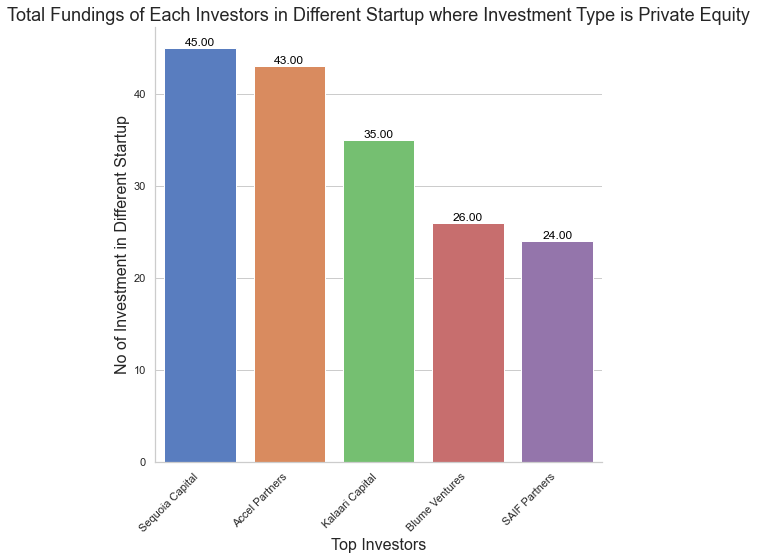

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')
df = data.copy()
df["StartupName"].replace("Olacabs","Ola",inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("OYo Rooms","Oyo",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)


# Creating data frame consisting of only 2 columns "StartupName" and "InvestorsName"
# Dropping NA values

df = df[["StartupName","InvestorsName", 'InvestmentType']]
df.dropna(inplace=True)
ab = df[df["InvestmentType"] == 'Private Equity']  



startup_name=list(ab["StartupName"].values)
investor_name=list(ab["InvestorsName"].values)

# Traversing in the investor_name list , splitting by "," and applying the strip()
i=0
while i<len(investor_name):
    if ',' in investor_name[i] :
        l1 = investor_name[i].split(',')
        j = i 
        investor_name[j] = l1[0]
        j = j + 1
        for k in range(1,len(l1)): 
            investor_name.insert(j,l1[k].strip())
            startup_name.insert(j,startup_name[i])
            j = j + 1
        i = i + len(l1) - 1
    i = i + 1

# Creating a new list l2 and appending the investor name with their invested startup name 
# Creating list with only unique values by set() func.

l2 = []
for i in range(len(startup_name)):
    l2.append(investor_name[i]+"with"+startup_name[i])
l2 = list(set(l2))

# Creating a seperate list for the investor name 

l3 = []
for i in l2:
    i = i.split('with')
    l3.append(i[0].strip())

# Creating a new series with list of investor name 
df_new = pd.Series(l3)
x = df_new.value_counts().sort_values(ascending=False)
x.drop("",inplace=True)
x = x[0:5]
df = pd.DataFrame(x.index,columns=["Top 5 Investors"])
df["No. of Investment in Different Startup"] = x.values
print(df)


# plotting graph
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))
ax = sns.barplot(x=df['Top 5 Investors'].values, y= df["No. of Investment in Different Startup"], data=df, palette='muted', ci=None, capsize=0.2, errwidth=2)

plt.xlabel('Top Investors', fontsize=16)
plt.ylabel('No of Investment in Different Startup', fontsize=16)
plt.title('Total Fundings of Each Investors in Different Startup where Investment Type is Private Equity', fontsize=18)

plt.xticks(rotation=45, ha='right')
plt.bar_width = 0.6

sns.despine()

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()



# Conclusion

In the Scenario, where we want to find the Investors for our Startup, from the above insights, Bangalore and mostly the Metro-politan areas has most of the startups, implying most of the startups are funded in metro-politan areas.  

---

To find the insights of the Investor who has invested, looking at the above insights, Sequoia Capital has Invested Abundantly, about 517 millions. Majority has been invested in MetroPolitan cities. 

---

Checking on Investment type,
- For SeedFunding and CrowdFunding, Indian Angel Network and Some undisclosed network has invested at most.
- In Private Equity, Sequoia Capital has invested the most. 

---

Sequoia capital is 50% likely to invest in the startup since it has invested in most of the metro politan cities.